<a href="https://colab.research.google.com/github/adityapuri-009/AI_Workshop/blob/master/Day1_01_First_NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

In [9]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [10]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [11]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
mnist.train.num_examples

55000

In [14]:
mnist.test.num_examples

10000

In [15]:
mnist.validation.num_examples

5000

##Step 2- Visualizing the Data


In [0]:
import matplotlib.pyplot as plt


In [0]:
%matplotlib inline

In [18]:
mnist.train.images.shape

(55000, 784)

In [19]:
mnist.train.images[500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
my_img = mnist.train.images[500].reshape(28,28)

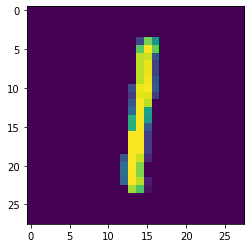

In [21]:
plt.imshow(my_img)

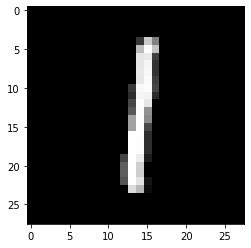

In [22]:
plt.imshow(my_img, cmap='gist_gray')

In [23]:
my_img.min()

0.0

In [24]:
my_img.max()

1.0

In [0]:
my_img2 = mnist.train.images[500].reshape(784,1)

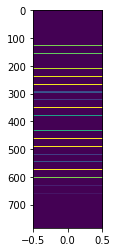

In [28]:
plt.imshow(my_img2, aspect=0.004)

##Step 3 - Building my first NN Model


1. Placeholders
2. Variables
3. Create our computation graph
4. Loss functions
5. Optimizer
6. Create and run the session


In [0]:
x = tf.placeholder(tf.float32, shape= [None, 784])

In [0]:
#Weights and bias
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
#create my computation graph
y = tf.matmul(x, W) + b 

In [0]:
y_true = tf.placeholder(tf.float32, shape= [None, 10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits= y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [0]:
#create and run the session

with tf.Session() as sess:
  sess.run(init)

  #Train 10000
  for step in range(10000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})

    # Evaluate the test / train model

    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true, 1))
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(accuracy, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))

print("Epoch: {}  cost={: .4f}".format(epoch+1, avg_cost))
print("Model has completed {} Epochs of training".format (training_epochs))

0.4886
0.5085
0.494
0.4834
0.4916
0.4973
0.5055
0.5104
0.5137
0.5221
0.536
0.5462
0.5616
0.5755
0.5882
0.5995
0.6095
0.6164
0.6198
0.6223
0.6258
0.6315
0.635
0.6394
0.6442
0.6478
0.6497
0.6533
0.6566
0.6607
0.6638
0.6656
0.6681
0.6693
0.6701
0.6717
0.6729
0.6745
0.677
0.6781
0.6788
0.6785
0.6775
0.6779
0.6772
0.6775
0.677
0.6767
0.6766
0.676
0.6759
0.6747
0.6751
0.6735
0.6749
0.6758
0.6766
0.6765
0.6783
0.6796
0.6805
0.6821
0.6827
0.6843
0.6847
0.6845
0.6835
0.6837
0.6847
0.6861
0.688
0.69
0.691
0.6935
0.695
0.6955
0.6965
0.6971
0.6984
0.6977
0.6983
0.699
0.7002
0.7011
0.7022
0.7037
0.7055
0.7065
0.7074
0.7091
0.7112
0.7143
0.7161
0.7183
0.7207
0.7222
0.7243
0.7253
0.7268
0.7286
0.7305
0.7311
0.7323
0.7338
0.7353
0.736
0.7374
0.7381
0.7382
0.7389
0.7393
0.7407
0.7414
0.7426
0.7435
0.7434
0.744
0.7455
0.7466
0.7472
0.7479
0.7479
0.7474
0.7481
0.7482
0.7486
0.7495
0.7497
0.7505
0.751
0.7514
0.7521
0.7522
0.7526
0.7527
0.7528
0.753
0.7533
0.7537
0.7545
0.7547
0.755
0.7568
0.7567
0.7577
0.